In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.drop(['sepal length (cm)','sepal width (cm)'], axis=1, inplace = True)
iris_df.tail()

,petal length (cm),petal width (cm)
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3
149,5.1,1.8


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

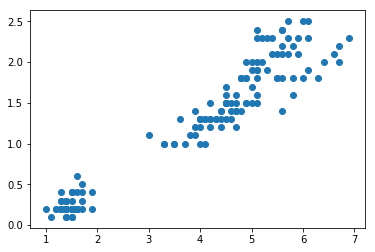

In [7]:
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
y_predicted = km.fit_predict(iris_df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris_df['cluster'] = y_predicted
iris_df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [11]:
iris_df.tail()

,petal length (cm),petal width (cm),cluster
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2
149,5.1,1.8,2


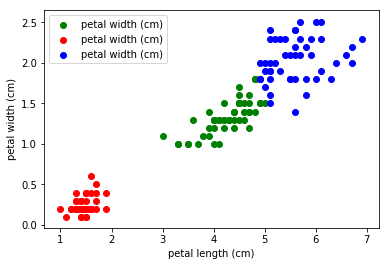

In [12]:
df0 = iris_df[iris_df.cluster==0]
df1 = iris_df[iris_df.cluster==1]
df2 = iris_df[iris_df.cluster==2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = "green")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = "red")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = "blue")

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df[['petal length (cm)']])
iris_df[['petal length (cm)']] = scaler.transform(iris_df[['petal length (cm)']])

iris_df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.2,1
1,0.067797,0.2,1
2,0.050847,0.2,1
3,0.084746,0.2,1
4,0.067797,0.2,1


In [14]:
iris_df.tail()

,petal length (cm),petal width (cm),cluster
145,0.711864,2.3,2
146,0.677966,1.9,2
147,0.711864,2.0,2
148,0.745763,2.3,2
149,0.694915,1.8,2


In [15]:
scaler = MinMaxScaler()
scaler.fit(iris_df[['petal width (cm)']])
iris_df[['petal width (cm)']] = scaler.transform(iris_df[['petal width (cm)']])

iris_df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [16]:
iris_df.tail()

,petal length (cm),petal width (cm),cluster
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2
149,0.694915,0.708333,2


In [17]:
#kmeans after feature scaling
km1 = KMeans(n_clusters=3)
y_predicted = km1.fit_predict(iris_df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
km1.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

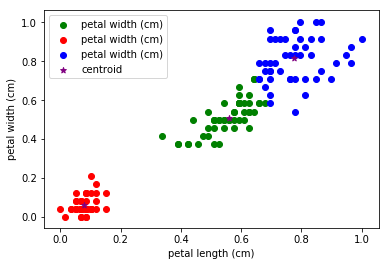

In [19]:
df0 = iris_df[iris_df.cluster==0]
df1 = iris_df[iris_df.cluster==1]
df2 = iris_df[iris_df.cluster==2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = "green")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = "red")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = "blue")
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [20]:
#gives same result as before feature scaling 

In [21]:
#elbow method
sse = [] #sum of squared errors
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(iris_df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)


In [22]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667126,
 0.853861735391224,
 0.6801035704886196,
 0.5651273455703979,
 0.48753039567435497,
 0.41326677825124736]

Text(0, 0.5, 'Sum of Squared error')

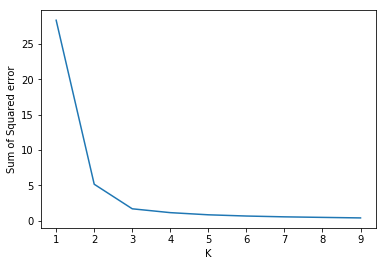

In [23]:
plt.plot(range(1,10), sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared error')